# COSC 3337 Lab 07 (__KNN__) Minh Nguyen

## Exploratory Data Analysis

Import libraries

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Loading and checking the dataset

In [167]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [168]:
diabetes_df.shape

(768, 9)

In [169]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No missing values yet. Let's check the data summary using `describe`.

In [170]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see something kinda strange here. There are a few columns having `0` values which don't make sense at such cases. It could probably because the real data was excluded (or might be missing values) and `replaced with zero values`.

We should make a rep version of the `diabetes_df` and modify the zero values (we might want to replace them with NaN). The list of columns needed to be updated is:
- `Glucose`
- `BloodPressure`
- `SkinThickness`
- `Insulin`
- `BMI`

In [171]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy['Glucose'] = diabetes_df_copy['Glucose'].replace(0,np.NaN)
diabetes_df_copy['BloodPressure'] = diabetes_df_copy['BloodPressure'].replace(0,np.NaN)
diabetes_df_copy['SkinThickness'] = diabetes_df_copy['SkinThickness'].replace(0,np.NaN)
diabetes_df_copy['Insulin'] = diabetes_df_copy['Insulin'].replace(0,np.NaN)
diabetes_df_copy['BMI'] = diabetes_df_copy['BMI'].replace(0,np.NaN)

In [172]:
diabetes_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [173]:
diabetes_df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The data now looks more reasonable.

Let's take a look at their distributions.

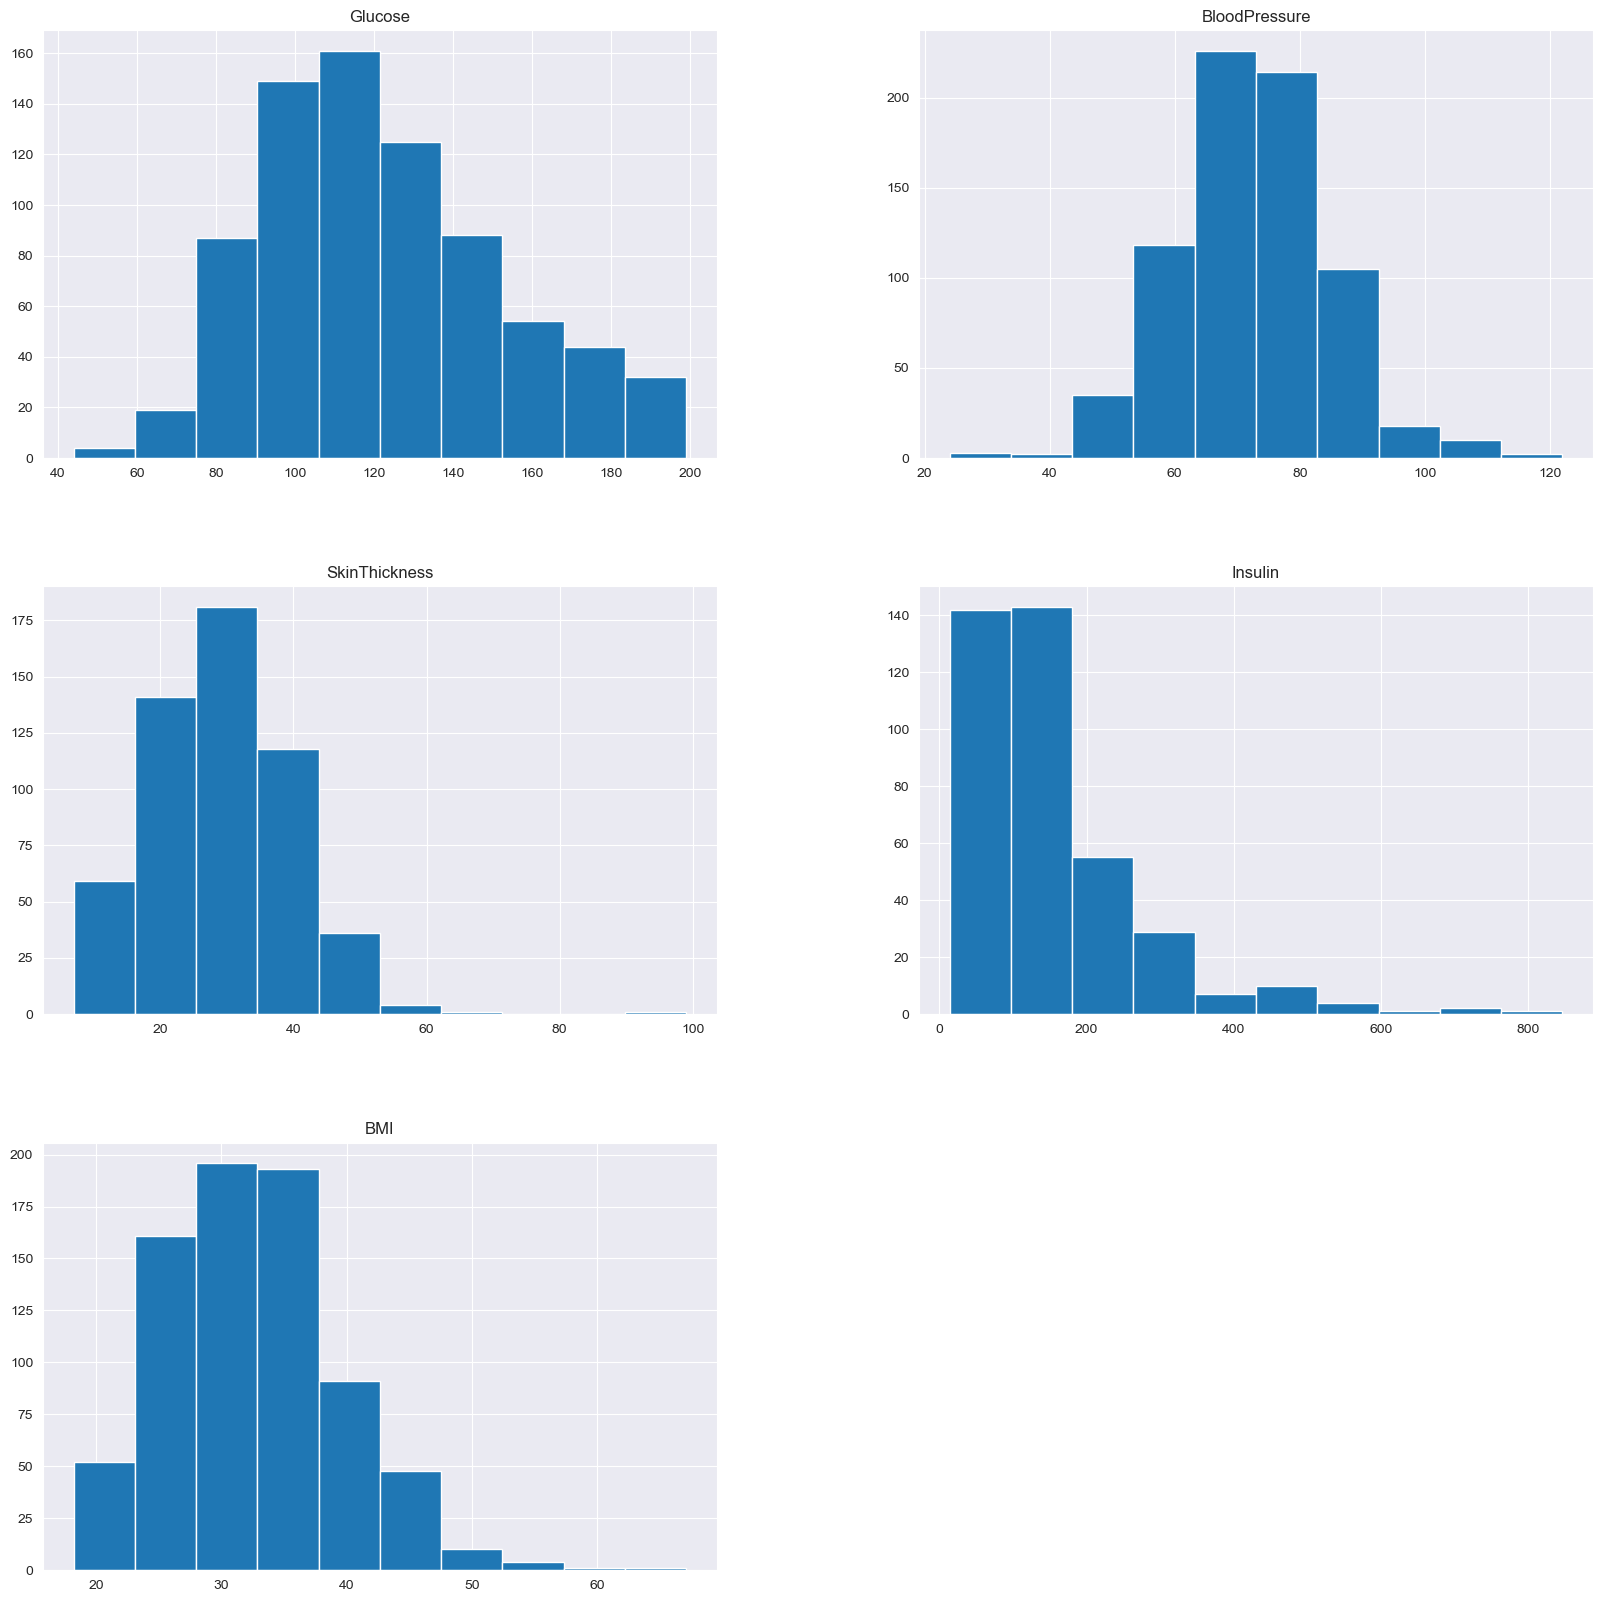

In [174]:
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize = (20,20))
plt.show()

Which ones are skewed? `SkinThickness`, `Insulin` and `BMI` looks `skewed`, so we should replace their `NaN` values with `median`, while we replace the `NaN` values with `mean` in other columns.

In [175]:
# replace missing values with median (skewed)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

# replace missing values with mean (not too skewed)
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)

In [176]:
# diabetes_df_copy.info()
diabetes_df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let's check again these columns' distributions

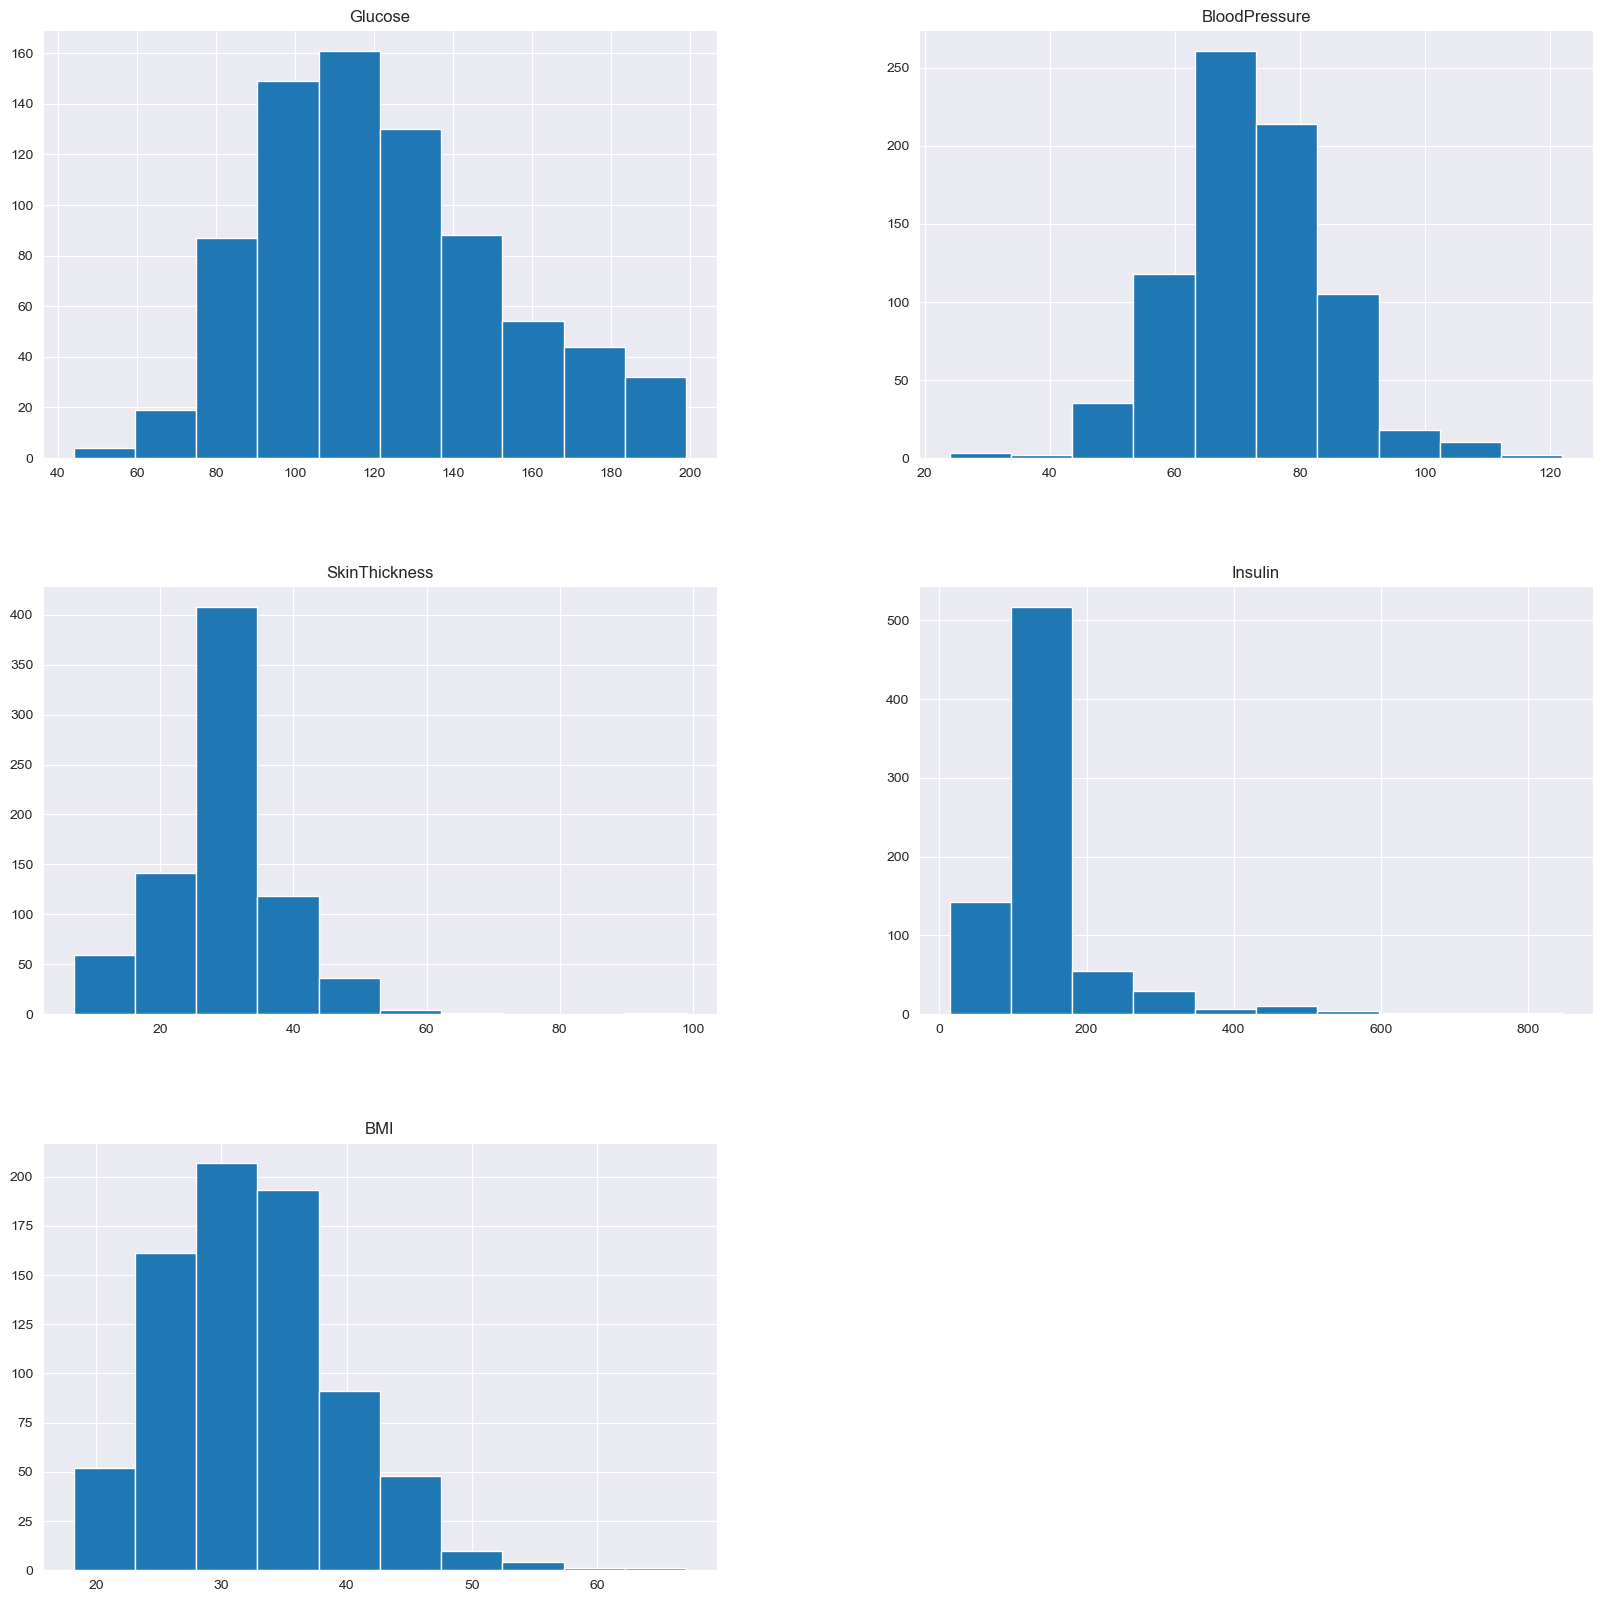

In [177]:
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize = (20,20))
plt.show()

_Not too great but better than the previous ones._

Let's create a `heatmap` and see if there are any `correlations` in our dataset.

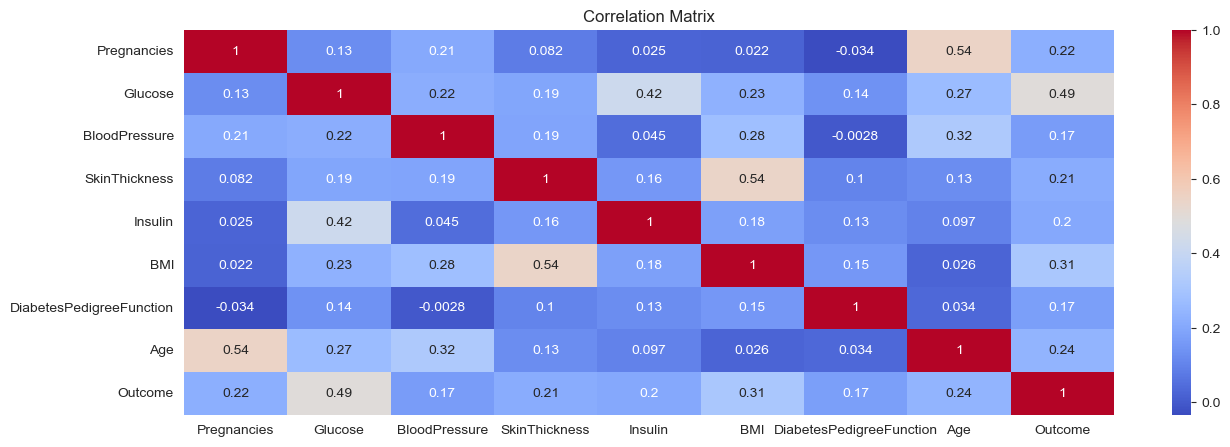

In [178]:
sns.heatmap(diabetes_df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- We don't see any significant case of multi collinearity hear.

Check a few `scatterplots` of the dataset.

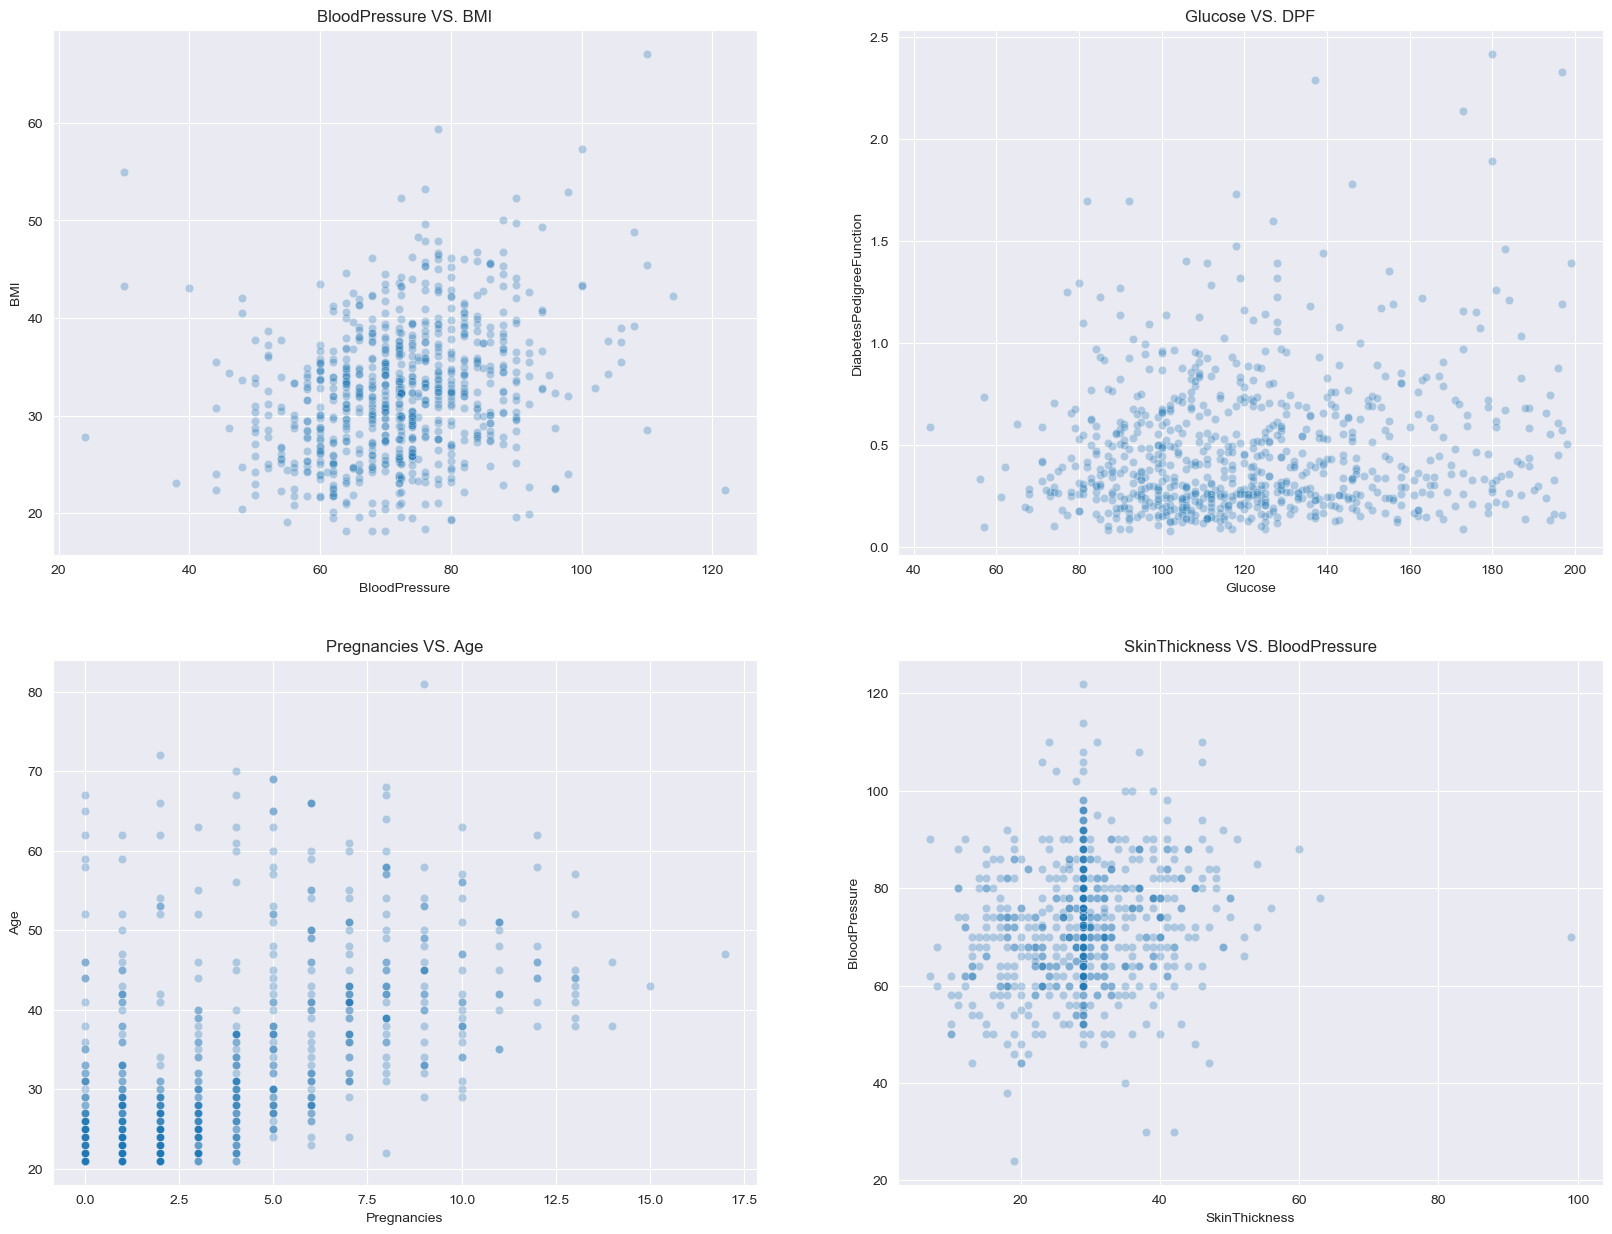

In [179]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x='BloodPressure', y='BMI', data=diabetes_df_copy, alpha=0.3, ax=axes[0][0])
axes[0][0].set_title('BloodPressure VS. BMI')

sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', data=diabetes_df_copy, alpha=0.3, ax=axes[0][1])
axes[0][1].set_title('Glucose VS. DPF')

# add a few more
sns.scatterplot(x='Pregnancies', y='Age', data=diabetes_df_copy, alpha=0.3, ax=axes[1][0])
axes[1][0].set_title('Pregnancies VS. Age')

sns.scatterplot(x='SkinThickness', y='BloodPressure', data=diabetes_df_copy, alpha=0.3, ax=axes[1][1])
axes[1][1].set_title('SkinThickness VS. BloodPressure')

plt.show()

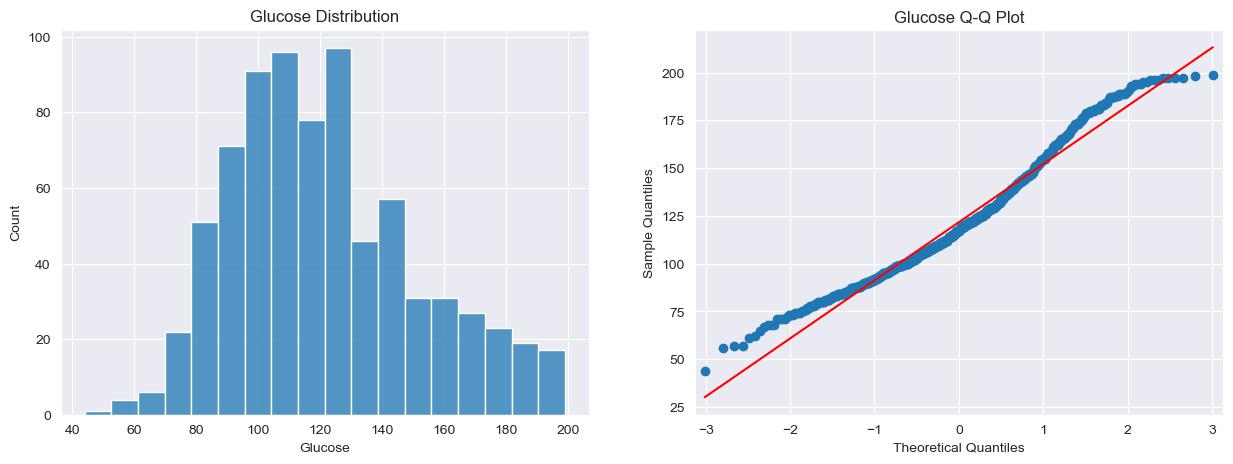

Shapiro-Wilk: 
w:0.9699020385742188, p-value:1.7770054525079182e-11

Kolmogorov-Smirnov: 
d:0.9699020385742188, p-value:0.0

Skewness of the data: 
0.531677628850459



In [180]:
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(diabetes_df_copy['Glucose'], ax=axes[0])
axes[0].set_title('Glucose Distribution')

sm.qqplot(diabetes_df_copy['Glucose'], line='s', ax=axes[1])
axes[1].set_title('Glucose Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['Glucose'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['Glucose'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['Glucose'])))

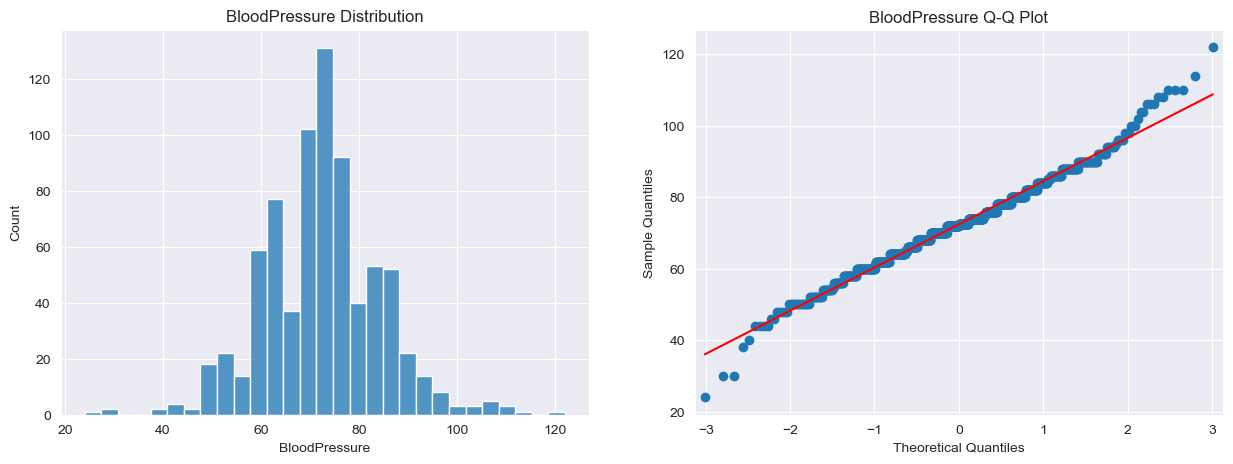

Shapiro-Wilk: 
w:0.9880392551422119, p-value:6.46664102532668e-06

Kolmogorov-Smirnov: 
d:0.9880392551422119, p-value:0.0

Skewness of the data: 
0.1370370472689305



In [181]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(diabetes_df_copy['BloodPressure'], ax=axes[0])
axes[0].set_title('BloodPressure Distribution')

sm.qqplot(diabetes_df_copy['BloodPressure'], line='s', ax=axes[1])
axes[1].set_title('BloodPressure Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['BloodPressure'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['BloodPressure'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['BloodPressure'])))

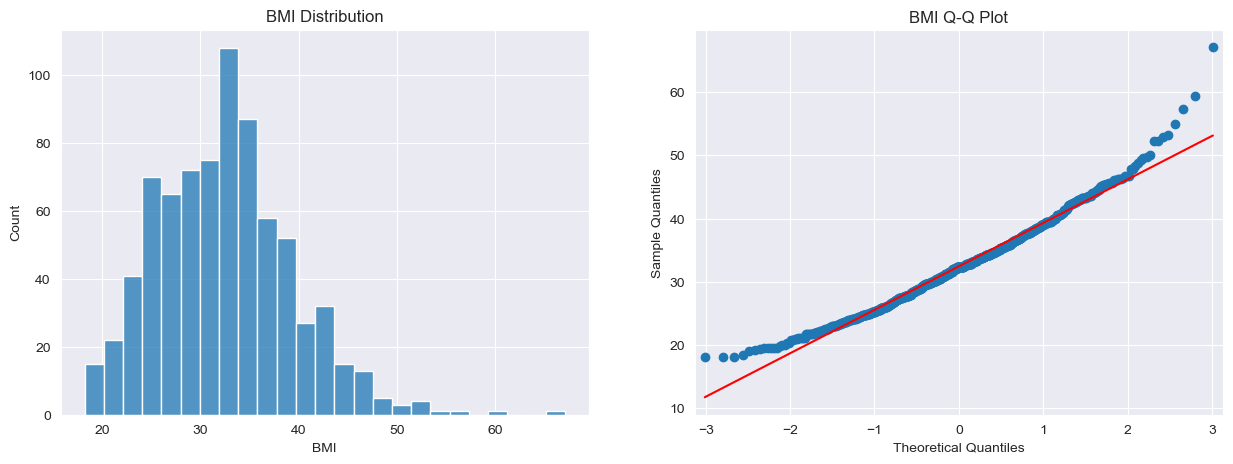

Shapiro-Wilk: 
w:0.9794445037841797, p-value:6.443597211358565e-09

Kolmogorov-Smirnov: 
d:0.9794445037841797, p-value:0.0

Skewness of the data: 
0.5980615087222572



In [182]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(diabetes_df_copy['BMI'], ax=axes[0])
axes[0].set_title('BMI Distribution')

sm.qqplot(diabetes_df_copy['BMI'], line='s', ax=axes[1])
axes[1].set_title('BMI Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['BMI'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['BMI'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['BMI'])))

- How does the glucose distribution of people with diabetes vary from those without?

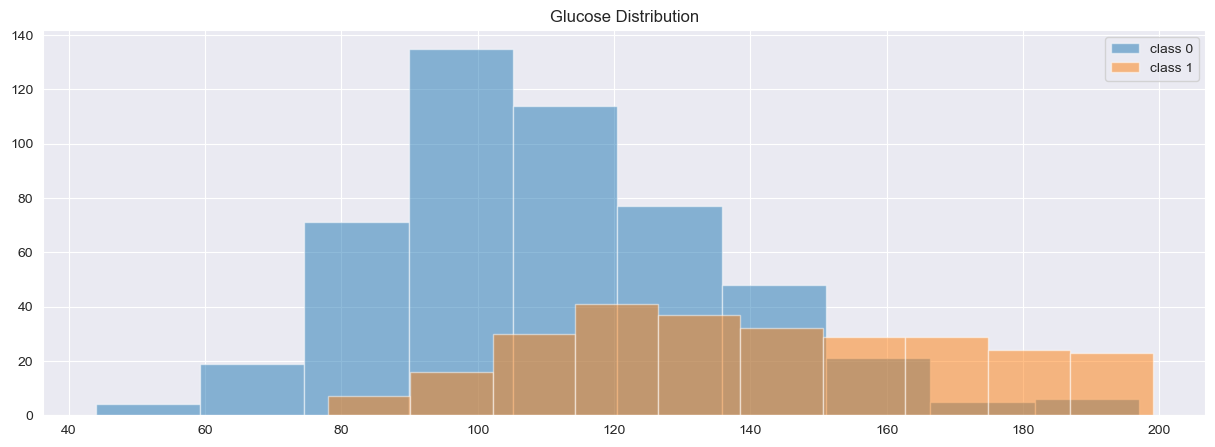

In [183]:
class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

plt.hist(x=class_zero['Glucose'], label='class 0', alpha=0.5)
plt.hist(x=class_one['Glucose'], label='class 1', alpha=0.5)
plt.legend()
plt.title('Glucose Distribution')

plt.show()

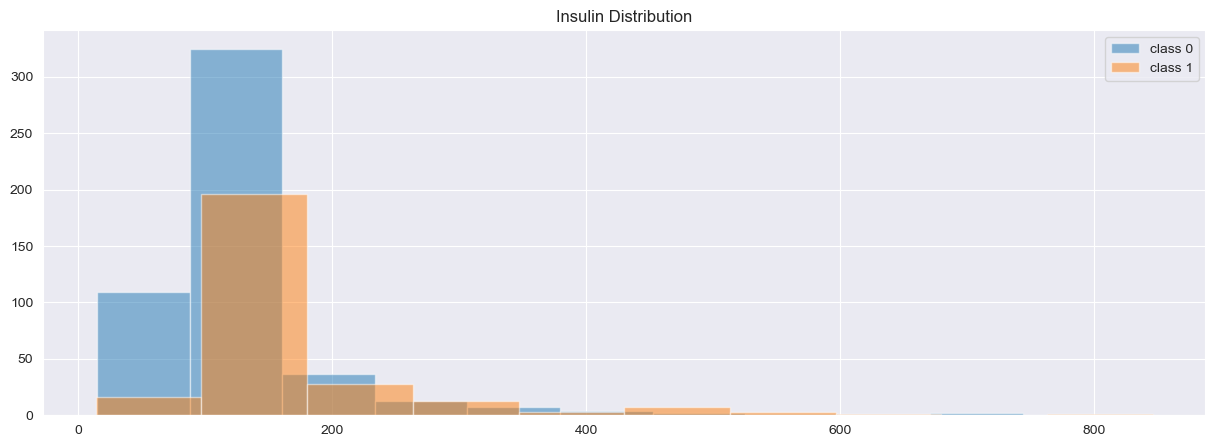

In [184]:
# class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
# class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

plt.hist(x=class_zero['Insulin'], label='class 0', alpha=0.5)
plt.hist(x=class_one['Insulin'], label='class 1', alpha=0.5)
plt.legend()
plt.title('Insulin Distribution')

plt.show()

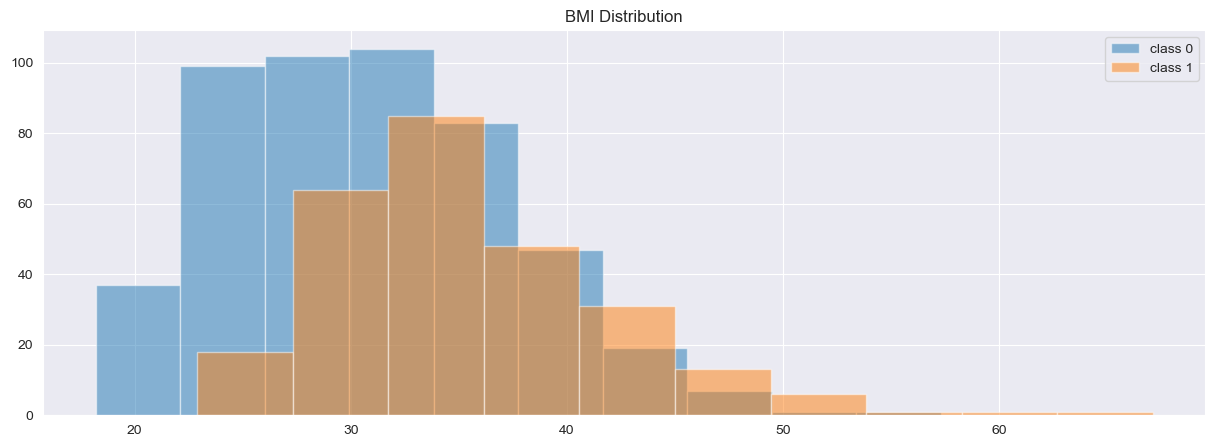

In [185]:
class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

plt.hist(x=class_zero['BMI'], label='class 0', alpha=0.5)
plt.hist(x=class_one['BMI'], label='class 1', alpha=0.5)
plt.legend()
plt.title('BMI Distribution')

plt.show()

## Pre-Processing

Standardize our data

In [186]:
from sklearn.preprocessing import StandardScaler

# all columns except 'Outcome'
X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [187]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


## Creating our Model

Import `train_test_split` and `KNeighborsClassifier`

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Begin creating and training our model

- Let's check the `countplot` of `Outcome` column.

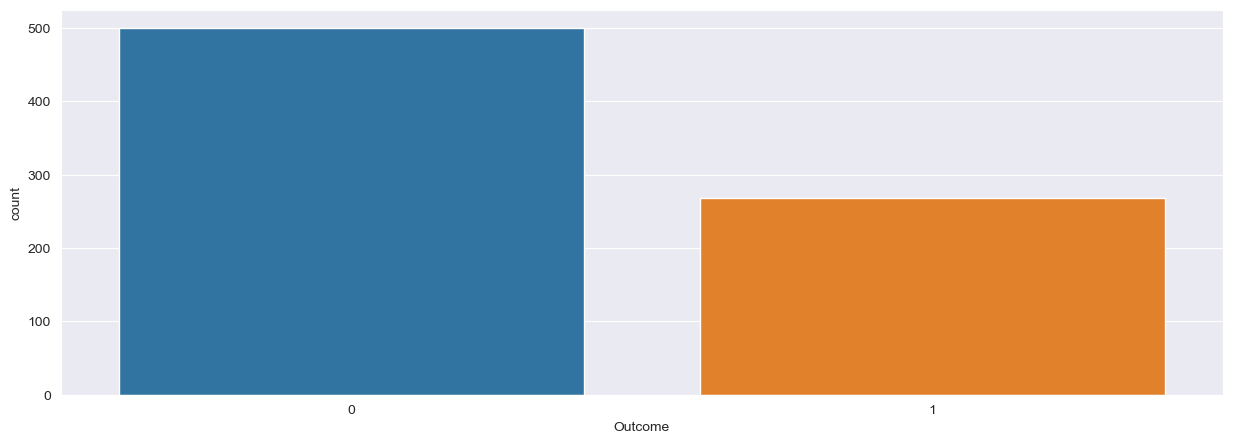

In [189]:
sns.countplot(x=diabetes_df_copy['Outcome'])
plt.show()

- The number of non-diabetics is almost `twice` the number of diabetic patients.

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Plotting different k values on the x axis, and the model score for that k value on the y-axis.

_Ignore the warning messages_

In [191]:
import warnings
warnings.filterwarnings('ignore')

In [192]:
test_scores = []
train_scores = []

# predict y
y_pred = knn.predict(X_test)
# error
errors = []

# testing k values from 1-14
for i in range(1,15):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    errors.append(np.mean(y_pred != y_test))

- Plot the `error` on the y-axis

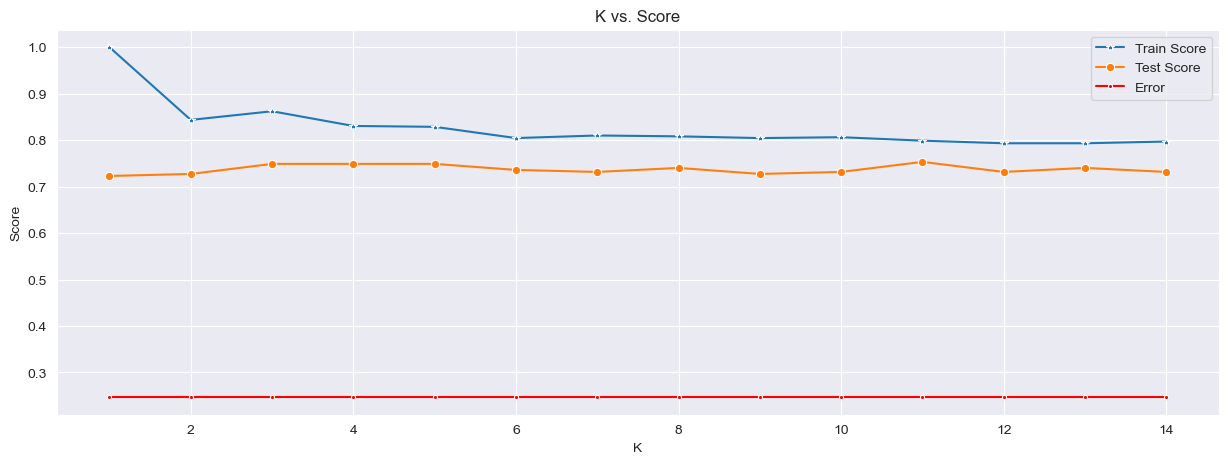

In [193]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
# plot the error
sns.lineplot(x=range(1,15), y=errors, marker='.', color='red', label='Error')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

The best result seems to be captured at k = 11 so 11 will be used for the final model.

In [194]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7532467532467533

- The score is not really bad but it could be better.

Print out a confusion matrix and classification report of our results.

In [195]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# comment out because y_pred was declared above
# y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[[127  23]
 [ 34  47]]
